# Polymer brush compression

This notebook compares the compression of various polymer brushes with different dispersities. We compare compression with and without a redistribution of the polymer mass.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Import custom package
import brush as b
from config import FIGURE_SIZE_LARGE, FIGURE_DPI, nature_colors

## Compare compression base on profile with compression from simulation

In [54]:
# Load the profiles
osmotic_prefactor = 1.0
brush_10 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D100.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_11 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D110.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_12 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D120.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_14 = b.Brush("simulation",
                   {"filename": "../data/Density_profile_D140.csv"},
                   osmotic_prefactor=osmotic_prefactor)

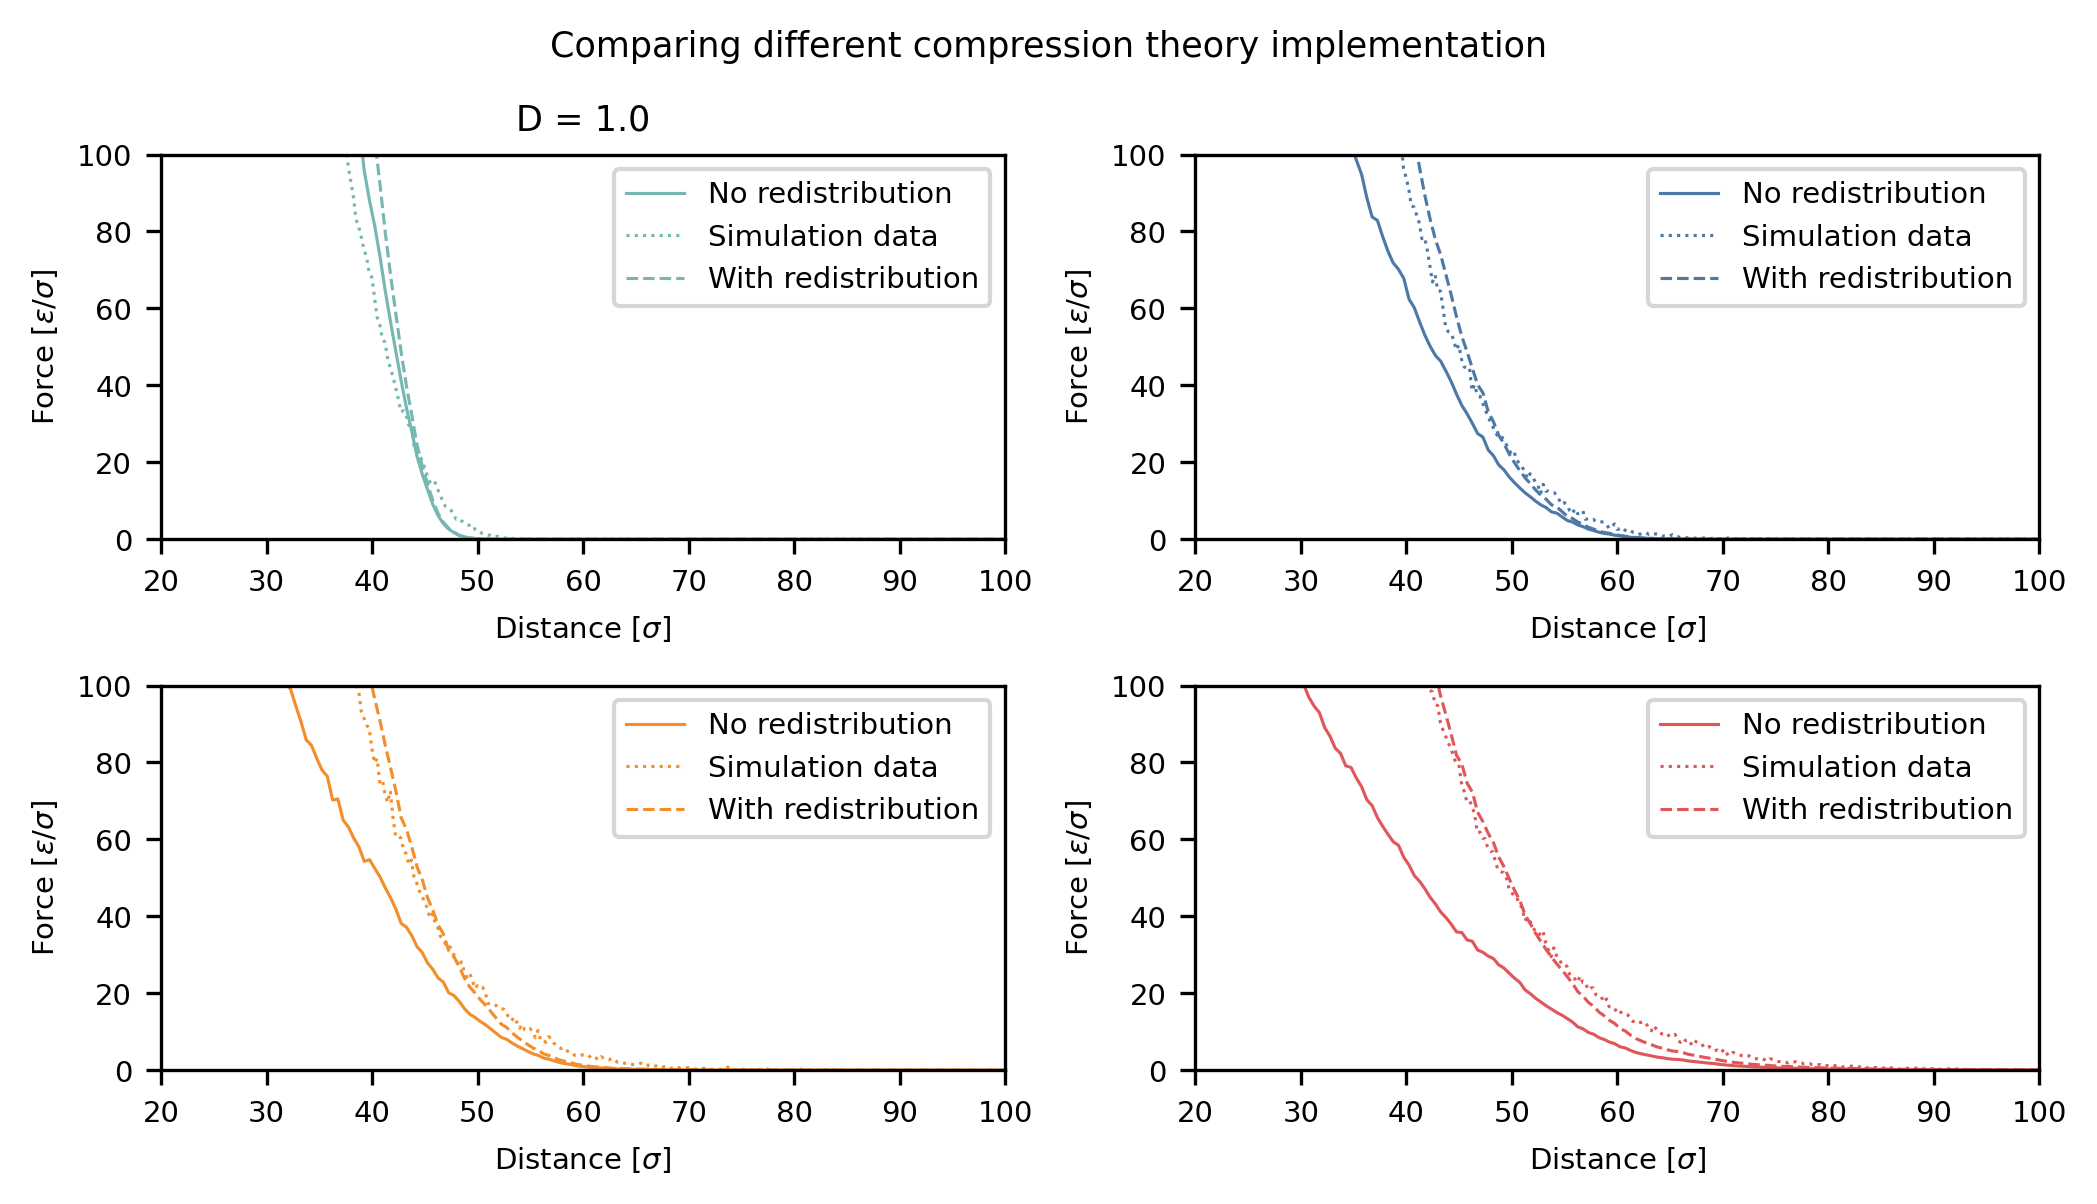

In [ ]:
# Compress the profiles 
beta = 0.00
brush_10.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_11.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_12.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_14.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)

OFFSET = 3

fig, ax = plt.subplots(figsize=FIGURE_SIZE_LARGE, dpi=FIGURE_DPI,ncols=2,nrows=2)

ax[0][0].plot(brush_10.z, brush_10.compression_force, "-", label='No redistribution', color=nature_colors[3])
data = pd.read_csv("../data/Compression_D100.csv")
ax[0][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[3])
brush_10.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][0].plot(brush_10.z,brush_10.compression_force,'--', label='With redistribution', color=nature_colors[3])
ax[0][0].set_title("D = 1.0")

ax[0][1].plot(brush_11.z, brush_11.compression_force, "-", label='No redistribution', color=nature_colors[0])
data = pd.read_csv("../data/Compression_D110.csv")
ax[0][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[0])
brush_11.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][1].plot(brush_11.z,brush_11.compression_force,'--', label='With redistribution', color=nature_colors[0])
ax[0][1].set_title("D = 1.1")


ax[1][0].plot(brush_12.z, brush_12.compression_force, "-", label='No redistribution', color=nature_colors[1])
data = pd.read_csv("../data/Compression_D120.csv")
ax[1][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[1])
brush_12.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][0].plot(brush_12.z,brush_12.compression_force,'--', label='With redistribution', color=nature_colors[1])
ax[1][0].set_title("D = 1.2")


ax[1][1].plot(brush_14.z, brush_14.compression_force, "-", label='No redistribution', color=nature_colors[2])
data = pd.read_csv("../data/Compression_D140.csv")
ax[1][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[2])
brush_14.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][1].plot(brush_14.z,brush_14.compression_force,'--', label='With redistribution', color=nature_colors[2])
ax[1][1].set_title("D = 1.4")


for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    ax.set_xlim([20,100])
    ax.set_xlabel("Distance [$\sigma$]")
    ax.set_ylim([0,100])
    ax.set_ylabel("Force [$\epsilon/\sigma$]")
    ax.legend()
    
fig.suptitle("Comparing different compression theory implementation")
fig.tight_layout()


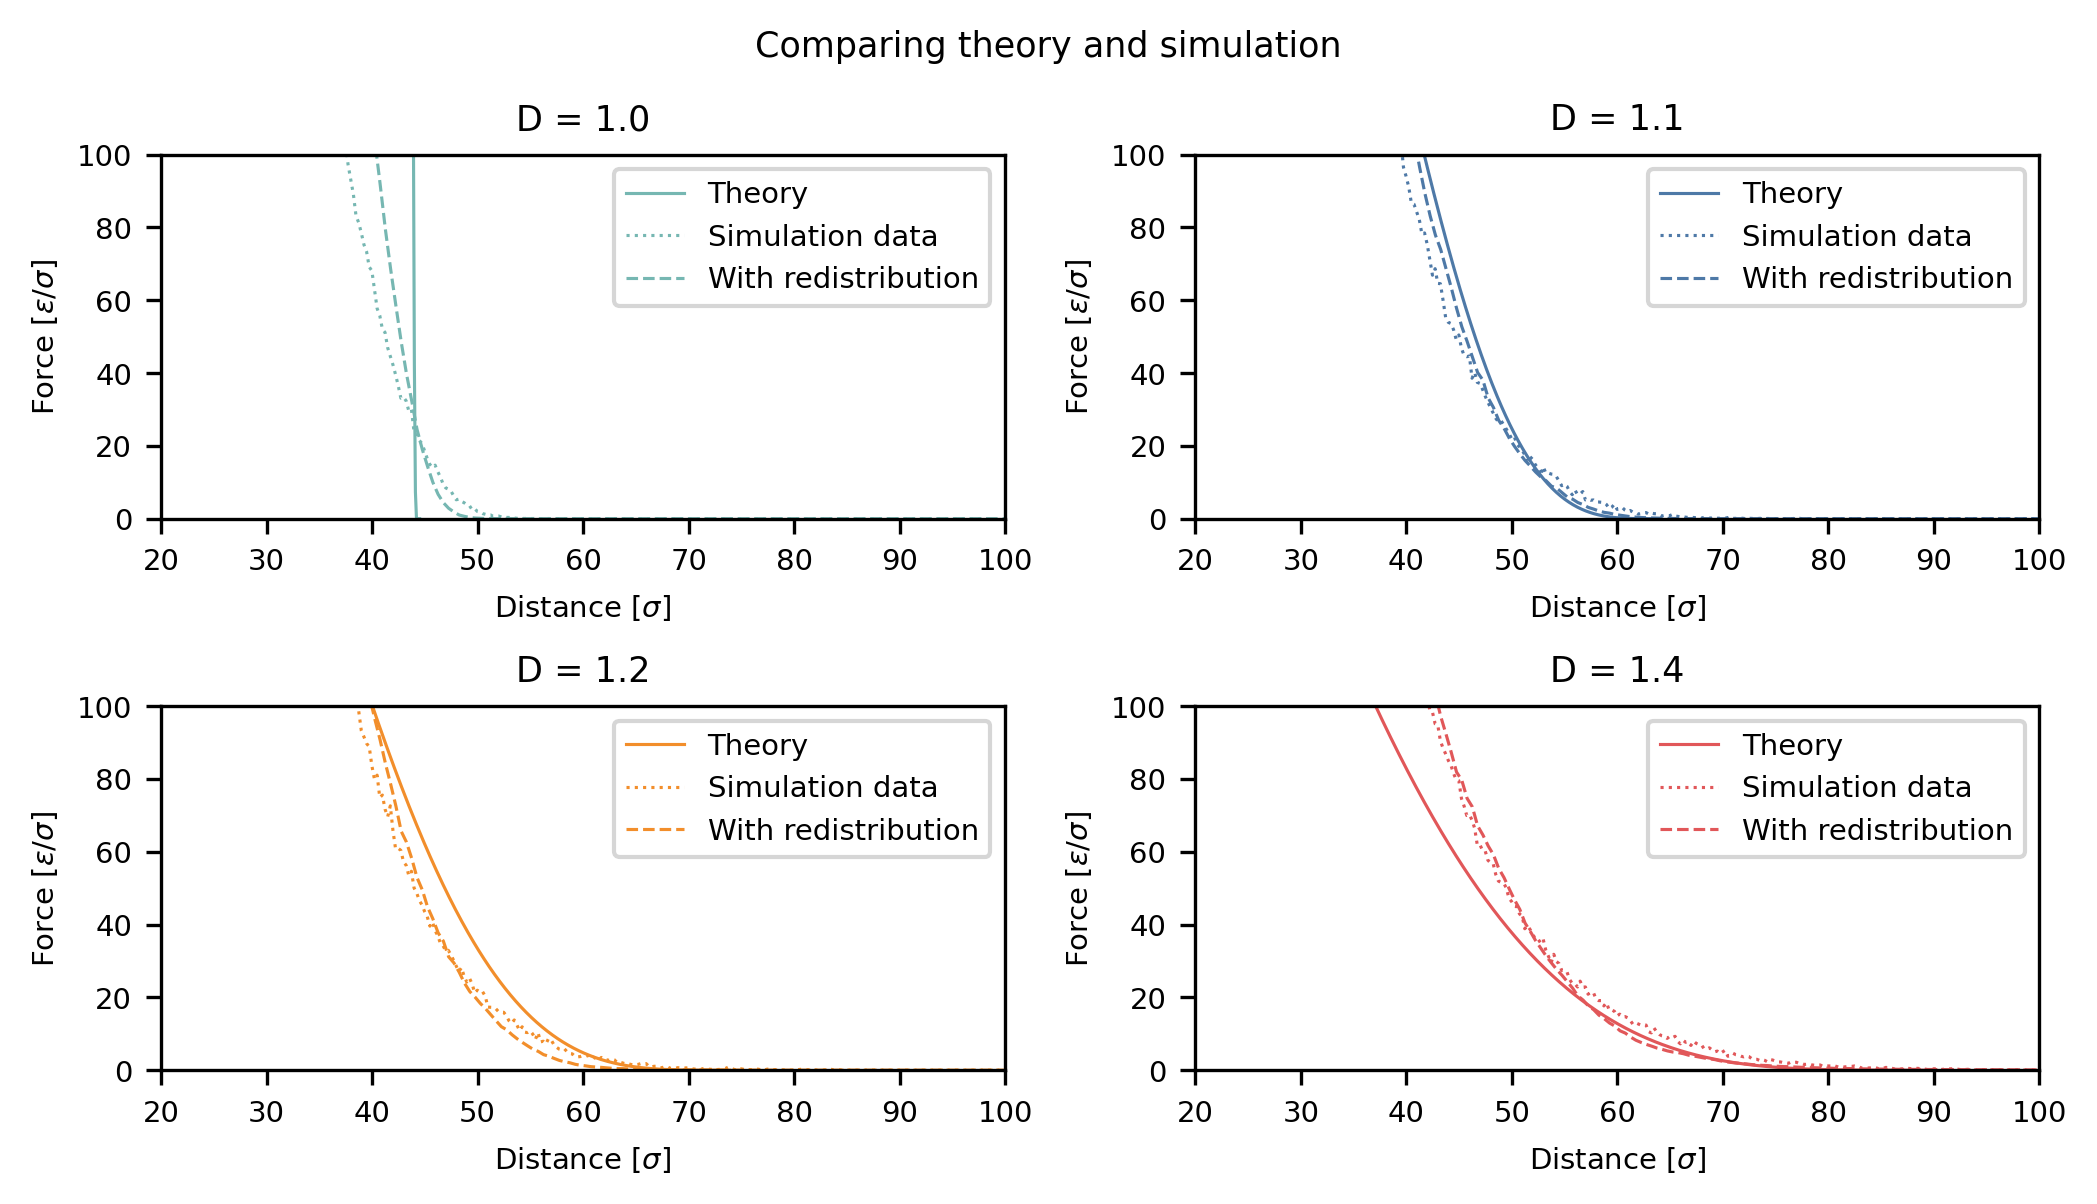

In [60]:
# Compress the profiles 
beta = 0.00
brush_10_th = b.Brush("model",
                      {"type" : "gaussian",
                       "Mn" : 100,
                       "sigma" : 0.1})
brush_10_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_11_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.1})
brush_11_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_12_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.2})
brush_12_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_14_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.4})
brush_14_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)

OFFSET = 3

fig, ax = plt.subplots(figsize=FIGURE_SIZE_LARGE, dpi=FIGURE_DPI,ncols=2,nrows=2)

ax[0][0].plot(brush_10_th.z, brush_10_th.compression_force, "-", label='Theory', color=nature_colors[3])
data = pd.read_csv("../data/Compression_D100.csv")
ax[0][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[3])
brush_10.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][0].plot(brush_10.z,brush_10.compression_force,'--', label='With redistribution', color=nature_colors[3])
ax[0][0].set_title("D = 1.0")


ax[0][1].plot(brush_11_th.z, brush_11_th.compression_force, "-", label='Theory', color=nature_colors[0])
data = pd.read_csv("../data/Compression_D110.csv")
ax[0][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[0])
brush_11.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][1].plot(brush_11.z,brush_11.compression_force,'--', label='With redistribution', color=nature_colors[0])
ax[0][1].set_title("D = 1.1")


ax[1][0].plot(brush_12_th.z, brush_12_th.compression_force, "-", label='Theory', color=nature_colors[1])
data = pd.read_csv("../data/Compression_D120.csv")
ax[1][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[1])
brush_12.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][0].plot(brush_12.z,brush_12.compression_force,'--', label='With redistribution', color=nature_colors[1])
ax[1][0].set_title("D = 1.2")


ax[1][1].plot(brush_14_th.z, brush_14_th.compression_force, "-", label='Theory', color=nature_colors[2])
data = pd.read_csv("../data/Compression_D140.csv")
ax[1][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[2])
brush_14.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][1].plot(brush_14.z,brush_14.compression_force,'--', label='With redistribution', color=nature_colors[2])
ax[1][1].set_title("D = 1.4")


for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    ax.set_xlim([20,100])
    ax.set_xlabel("Distance [$\sigma$]")
    ax.set_ylim([0,100])
    ax.set_ylabel("Force [$\epsilon/\sigma$]")
    ax.legend()
    
fig.suptitle("Comparing theory and simulation")
fig.tight_layout()